## Company Data

Q-A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
# importing data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
c_data=pd.read_csv("C:\\Users\\HP\\Downloads\\Company_Data.csv")

In [3]:
c_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## EDA

In [4]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
c_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
c_data.shape

(400, 11)

# data cleaning and preprocessing

In [7]:
c1_data=c_data.drop("Sales",axis=1)

In [8]:
c1_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
c1_data.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
company_data=pd.DataFrame(pd.cut(c_data.Sales,bins=3,labels=["Low","Medium","High"]))

In [11]:
company_data

,Sales
0,Medium
1,High
2,Medium
3,Medium
4,Low
...,...
395,High
396,Medium
397,Medium
398,Medium


In [12]:
Company_Data=pd.concat([c1_data,company_data],axis=1)

In [13]:
Company_Data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,139,23,3,37,120,Medium,55,11,No,Yes,Medium
397,162,26,12,368,159,Medium,40,18,Yes,Yes,Medium
398,100,79,7,284,95,Bad,50,12,Yes,Yes,Medium


# Visualization

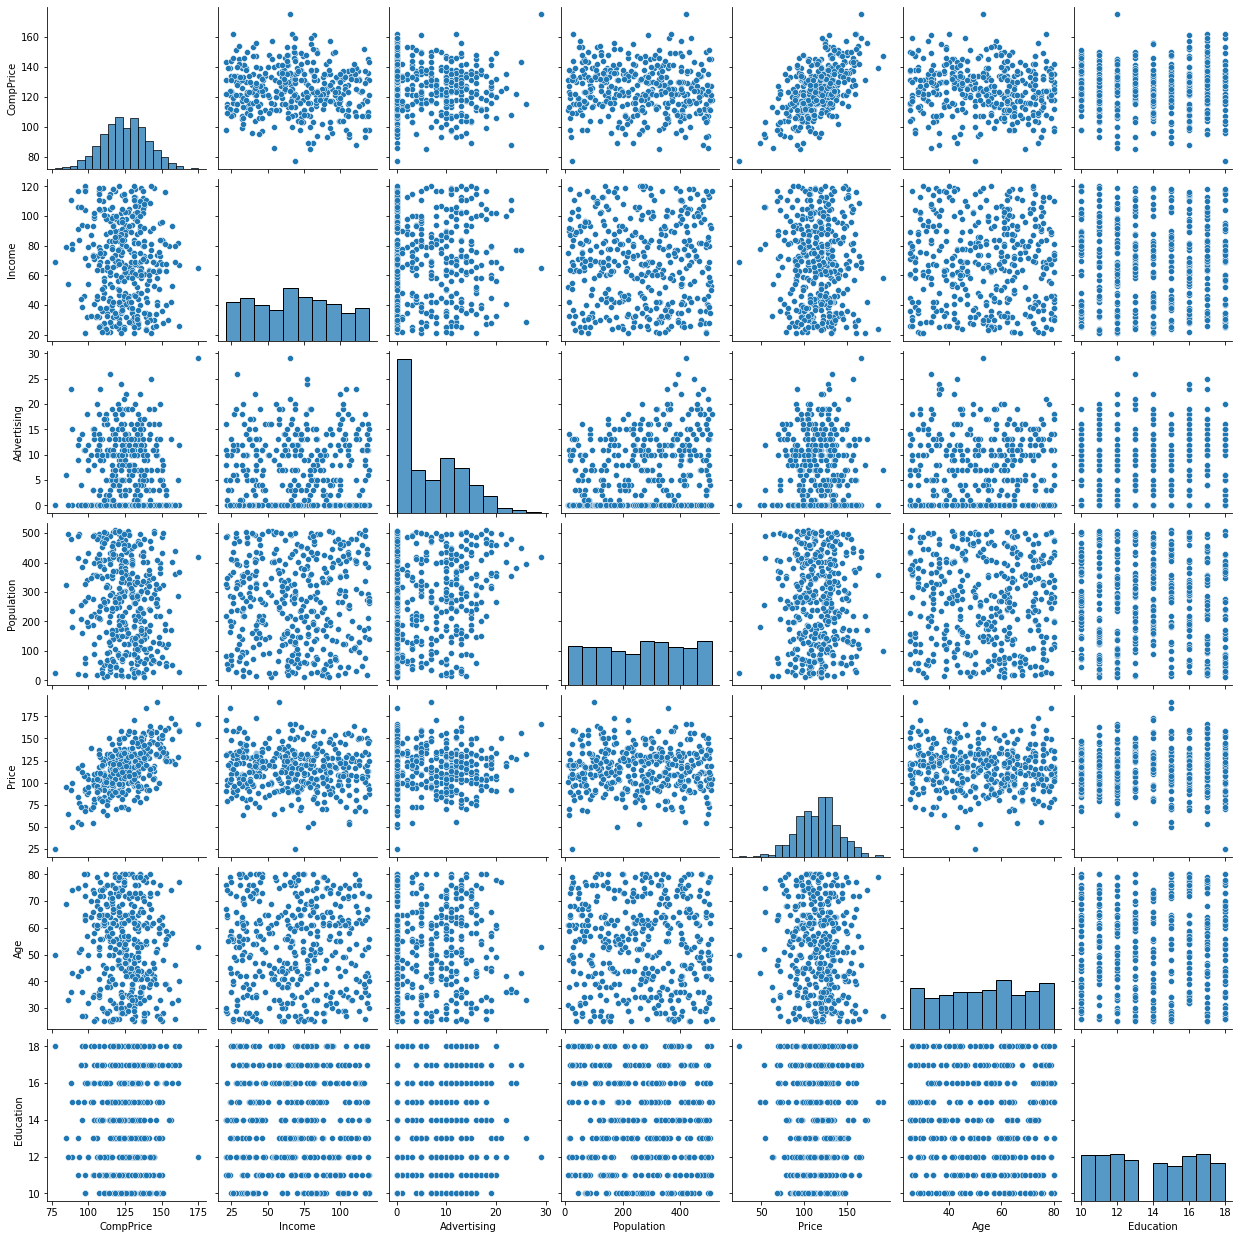

In [14]:
sns.pairplot(Company_Data)

<AxesSubplot:>

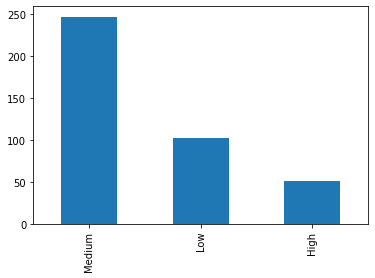

In [15]:
Company_Data["Sales"].value_counts().plot(kind="bar")

In [16]:
category_data=Company_Data.select_dtypes(exclude=[np.number]).columns

In [17]:
category_data

Index(['ShelveLoc', 'Urban', 'US', 'Sales'], dtype='object')

In [18]:
Company_Data[category_data].head()

,ShelveLoc,Urban,US,Sales
0,Bad,Yes,Yes,Medium
1,Good,Yes,Yes,High
2,Medium,Yes,Yes,Medium
3,Medium,Yes,Yes,Medium
4,Bad,Yes,No,Low


In [19]:
## label encoding 
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
for i in category_data:
    Company_Data[i]=labelEncoder.fit_transform(Company_Data[i])


In [20]:
Company_Data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


In [21]:
x=Company_Data.iloc[:,0:10]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [22]:
y=Company_Data.iloc[:,10]
y.head()

0    2
1    0
2    2
3    2
4    1
Name: Sales, dtype: int32

In [23]:
## spliting dataset
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=10)

# Building the Decision Tree Clasifier using Gini Criteria

In [24]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split=5)


In [25]:
model.fit(x,y)

DecisionTreeClassifier(min_samples_split=5)

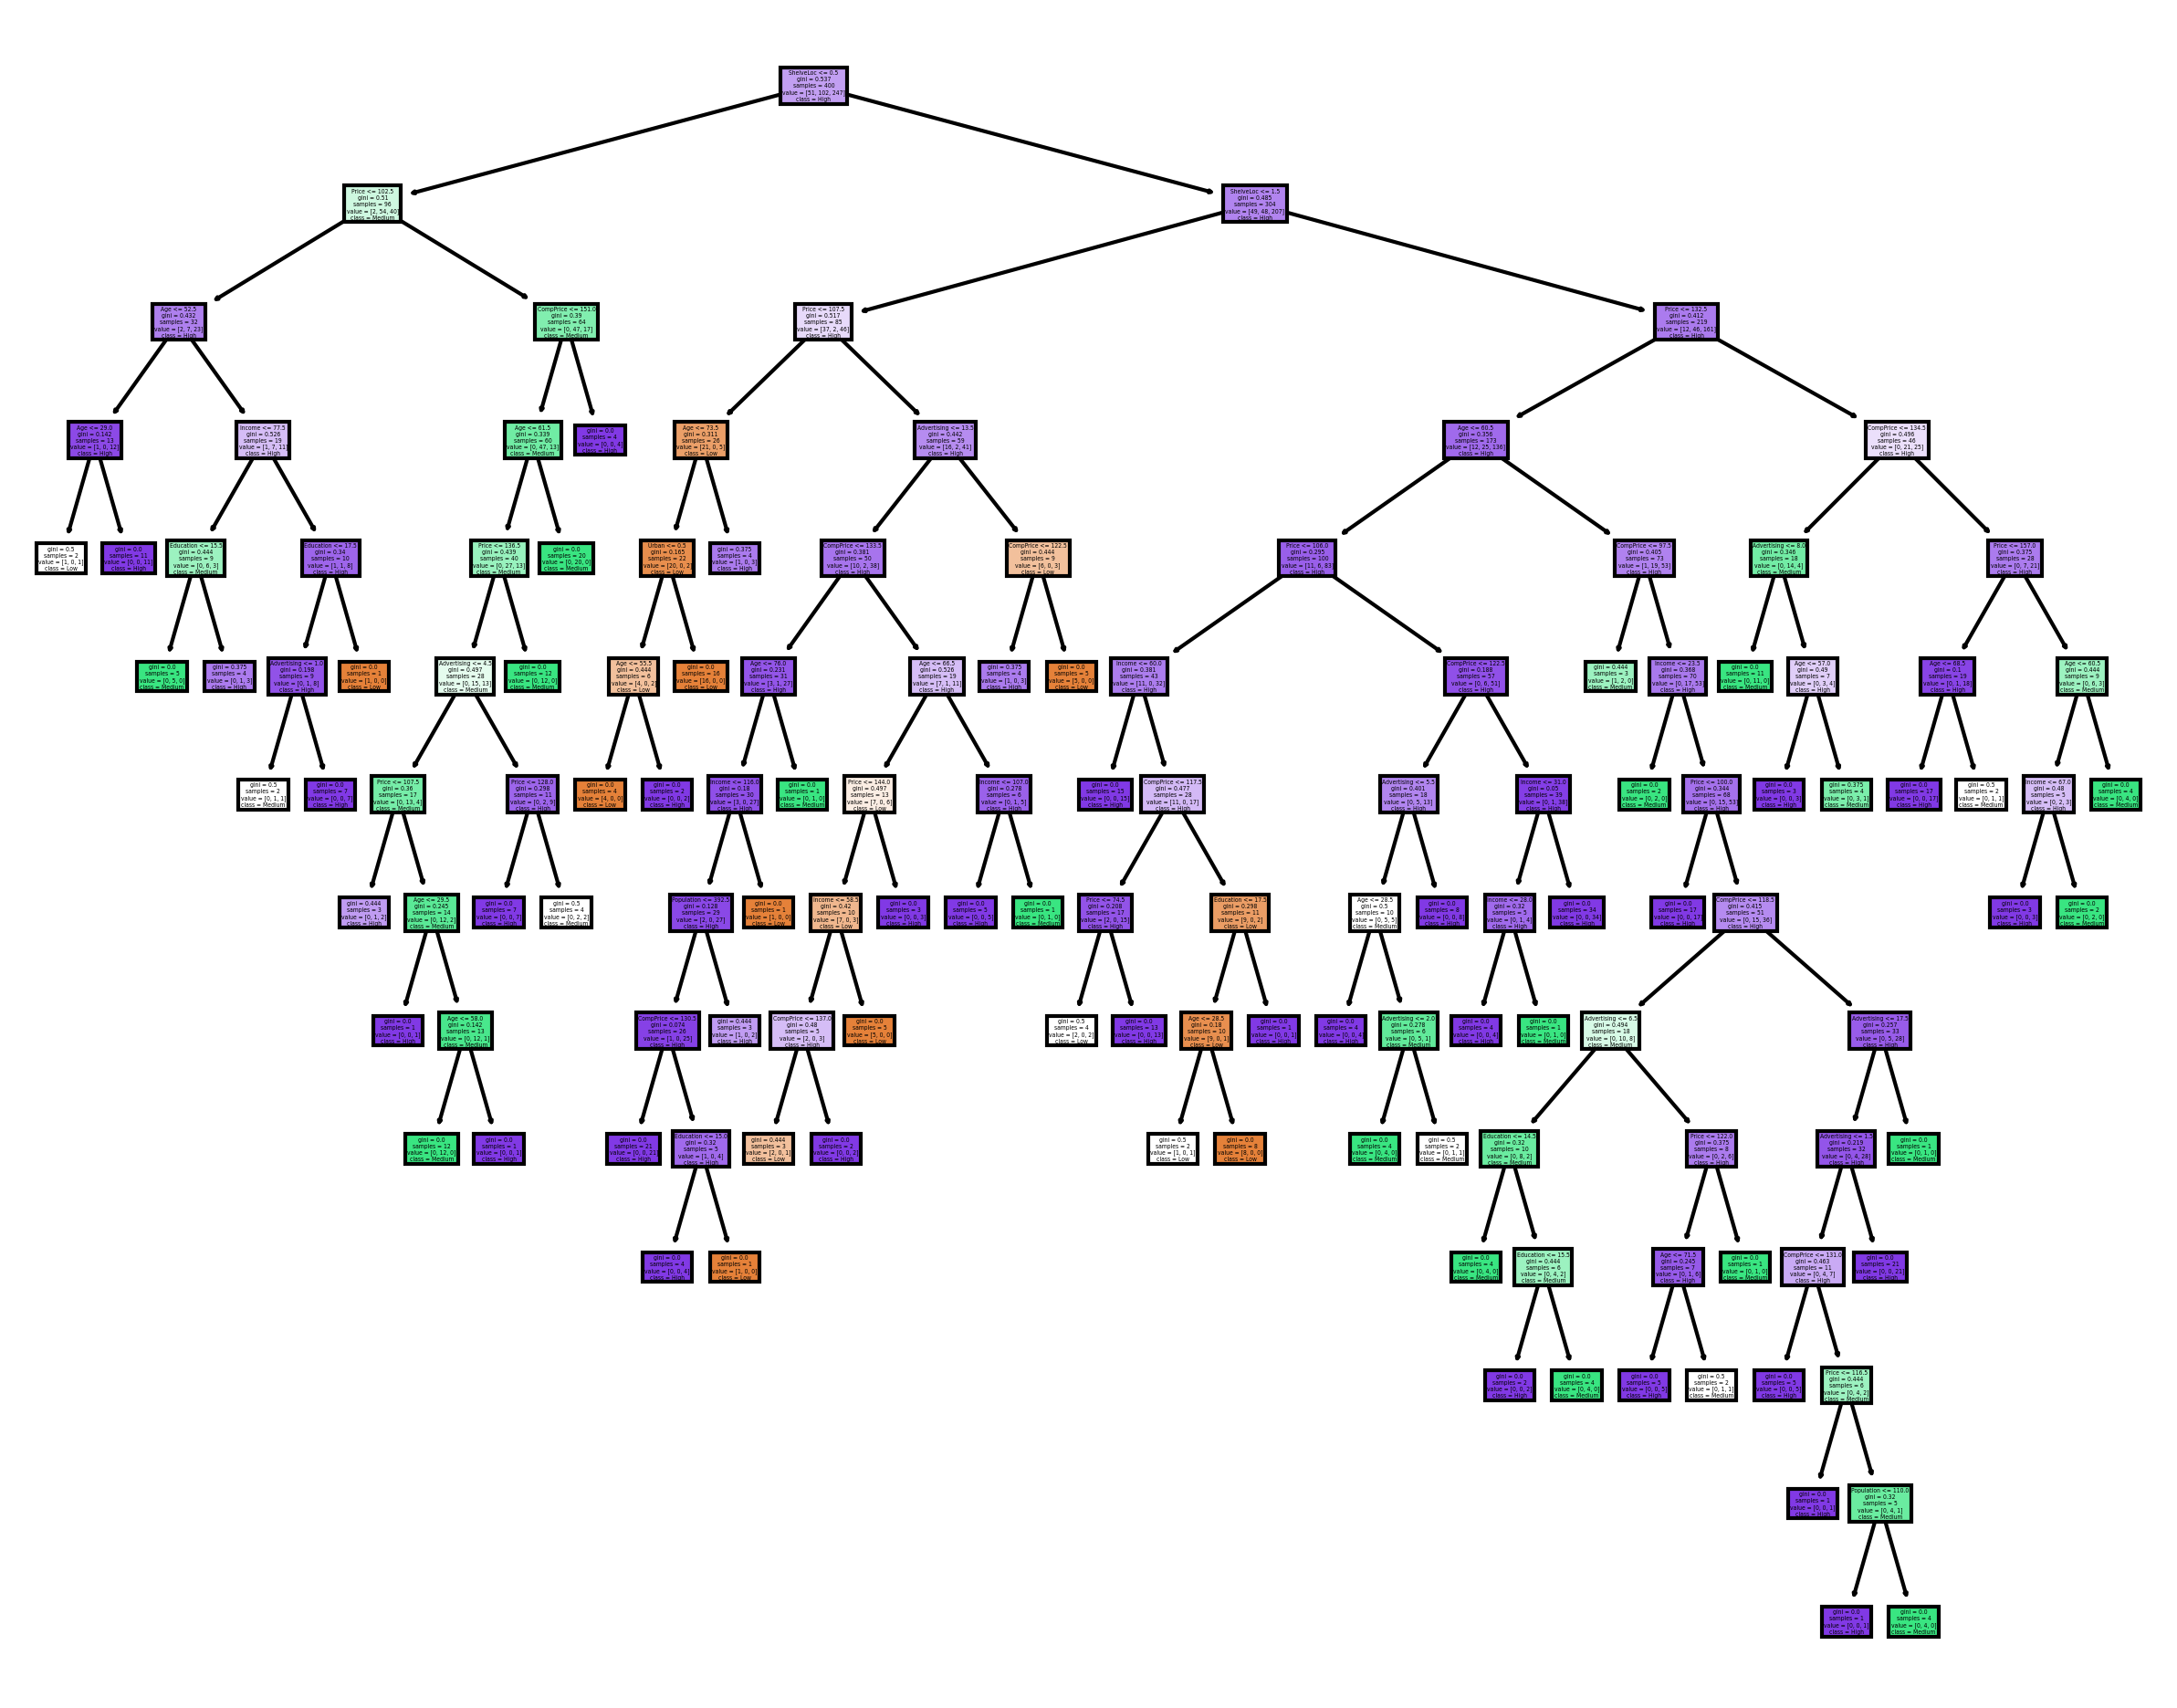

In [26]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(figsize = (10,8), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [27]:
# prediction
predict=model.predict(x_test)

In [28]:
print("Accuracy is",metrics.accuracy_score(predict,y_test)*100,'%')

Accuracy is 95.0 %


## building the decision tree clasifier using entropy

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3,)

In [30]:
model_entropy.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

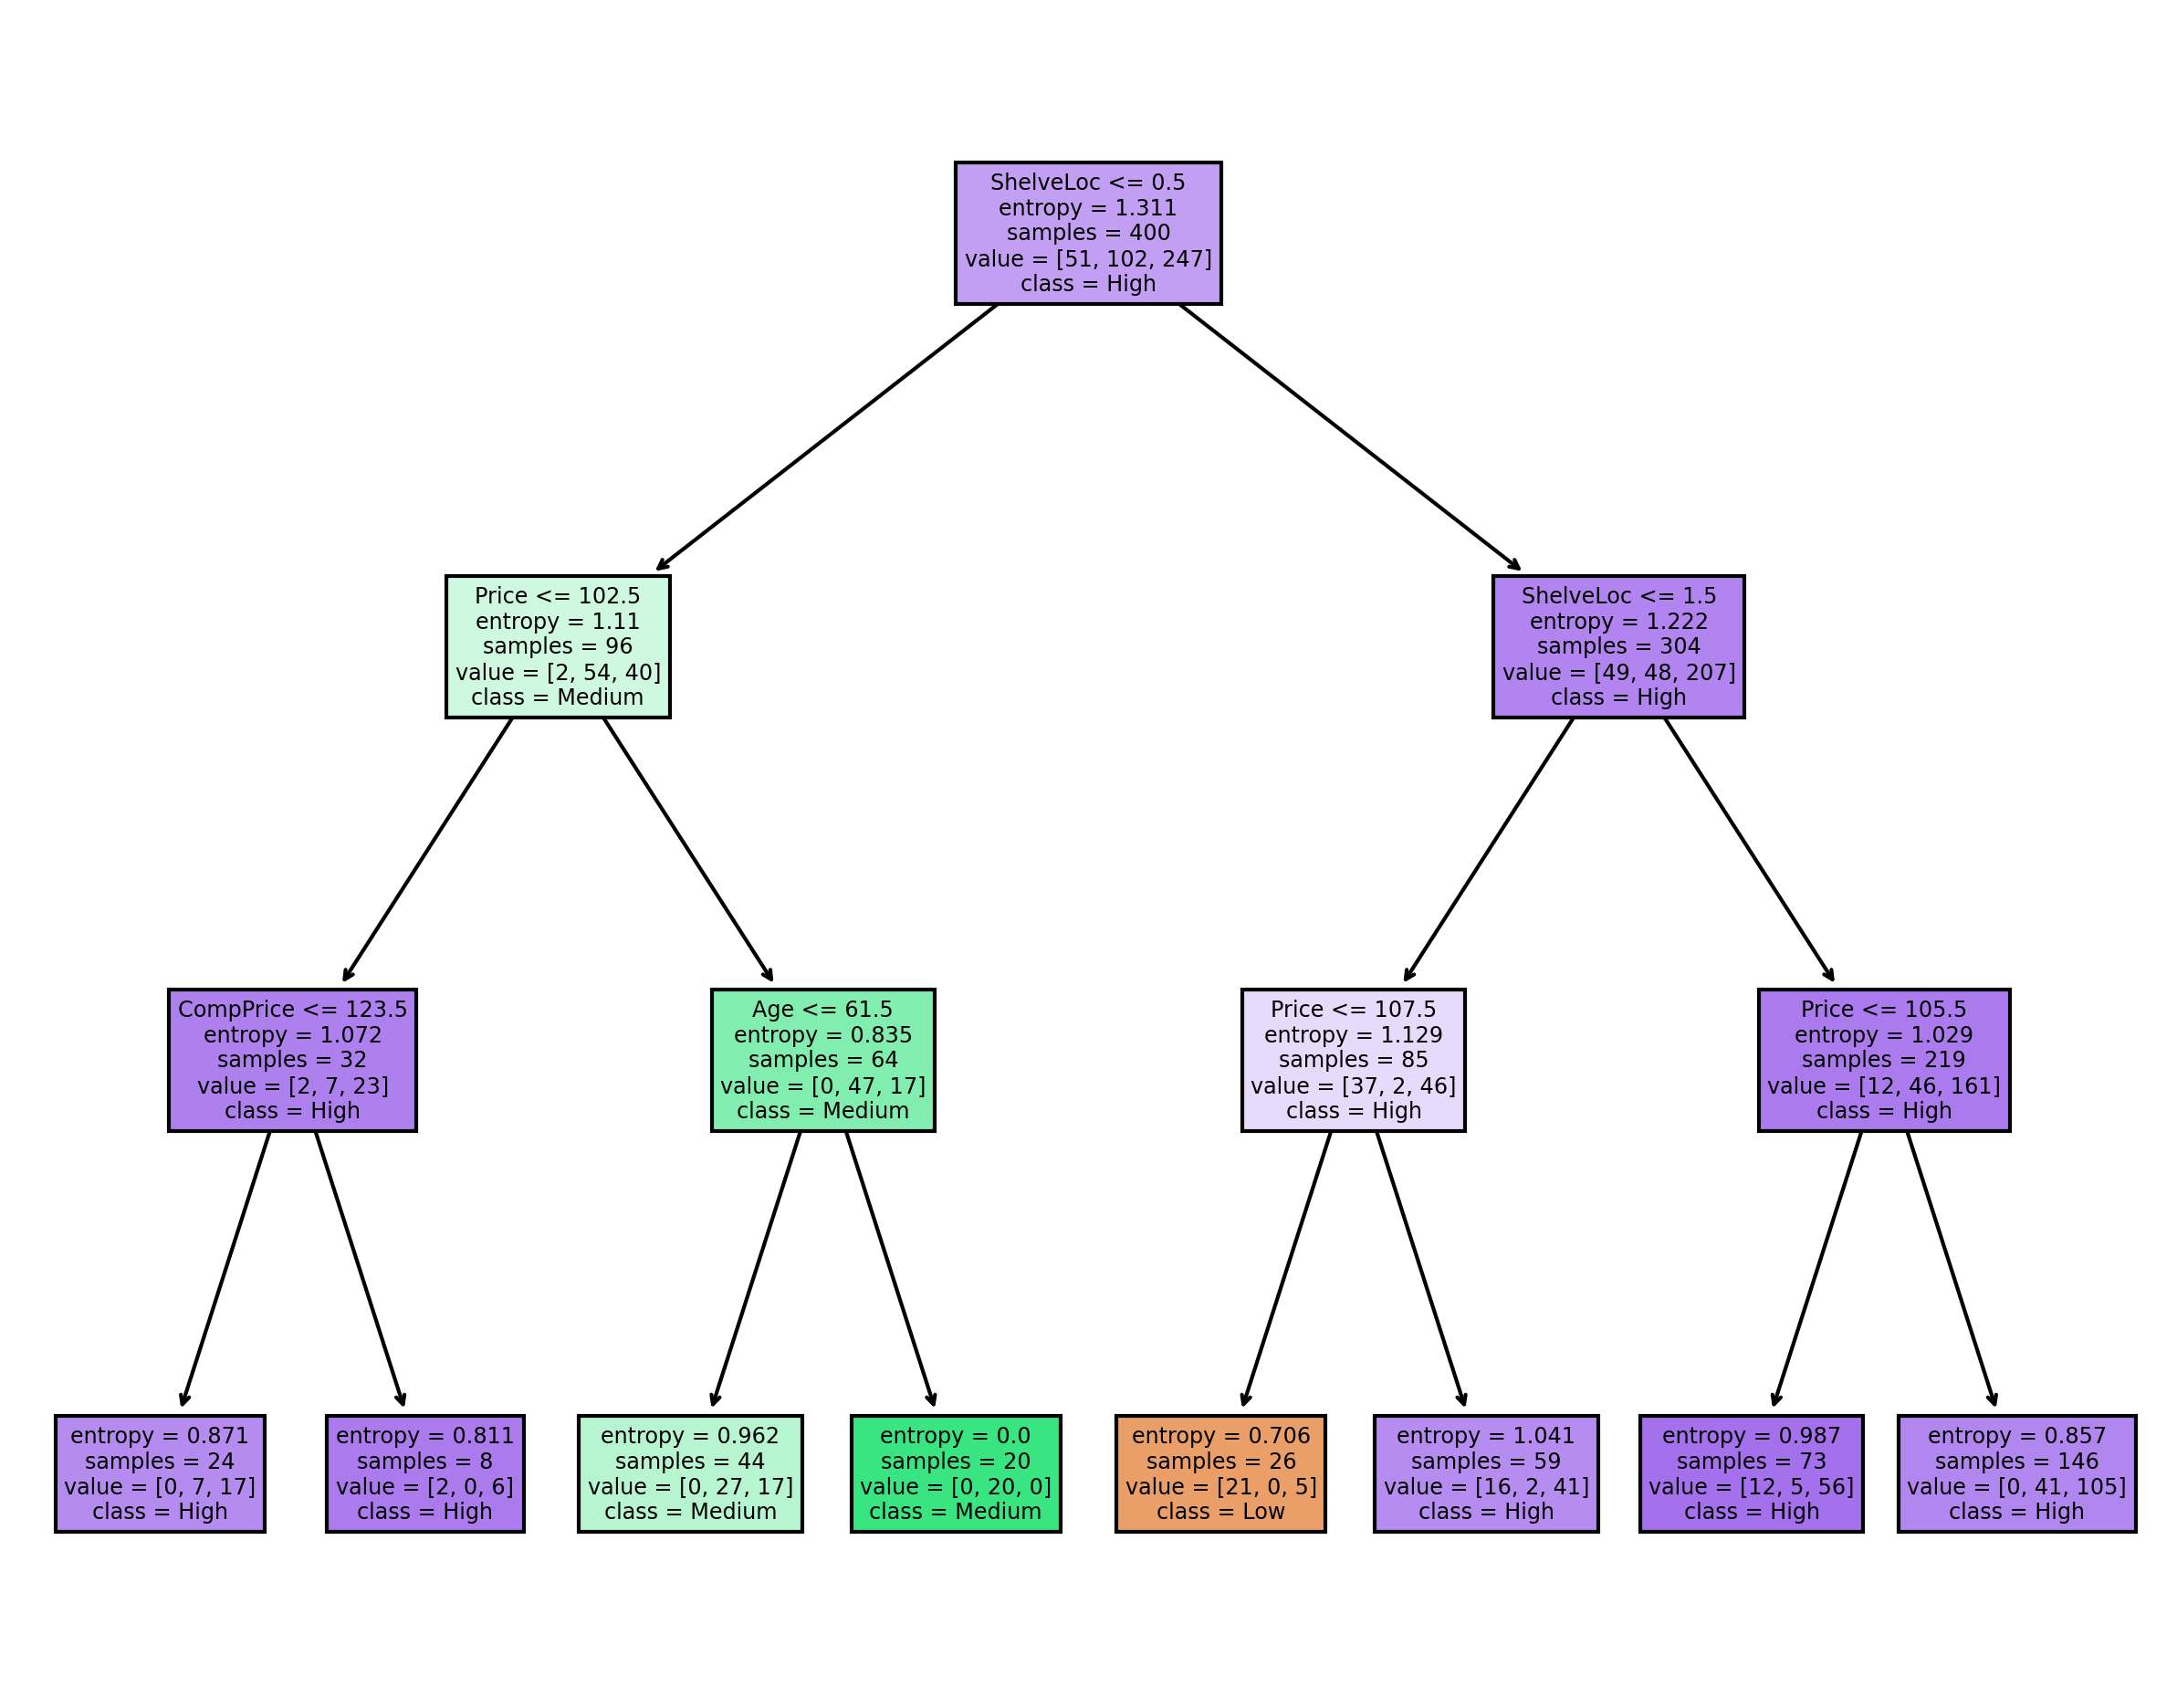

In [31]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,8), dpi=300)
tree.plot_tree(model_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:


confusion_matrix = confusion_matrix(y_test,predict)
print (confusion_matrix) 

[[10  0  2]
 [ 0 16  1]
 [ 0  1 50]]


In [34]:
from sklearn import metrics

In [35]:
pred=model_entropy.predict(x_test)
print("Accuracy is",metrics.accuracy_score(pred,y_test)*100,'%')

Accuracy is 68.75 %


## using Grid search CV

In [36]:
from sklearn.model_selection import GridSearchCV
Grid_Search=GridSearchCV(estimator=model,param_grid={"criterion":["entropy","gini"],"max_depth":[1,2,3,4,5,6,7,8,9,10,11,20,25]},cv=5)

In [37]:
Grid_Search.fit(x,y)
print(Grid_Search.best_params_)
print(Grid_Search.best_score_)

{'criterion': 'gini', 'max_depth': 4}
0.705


In [38]:
model1 = DecisionTreeClassifier(criterion = 'gini',min_samples_split=4)


In [39]:
model1.fit(x,y)

DecisionTreeClassifier(min_samples_split=4)

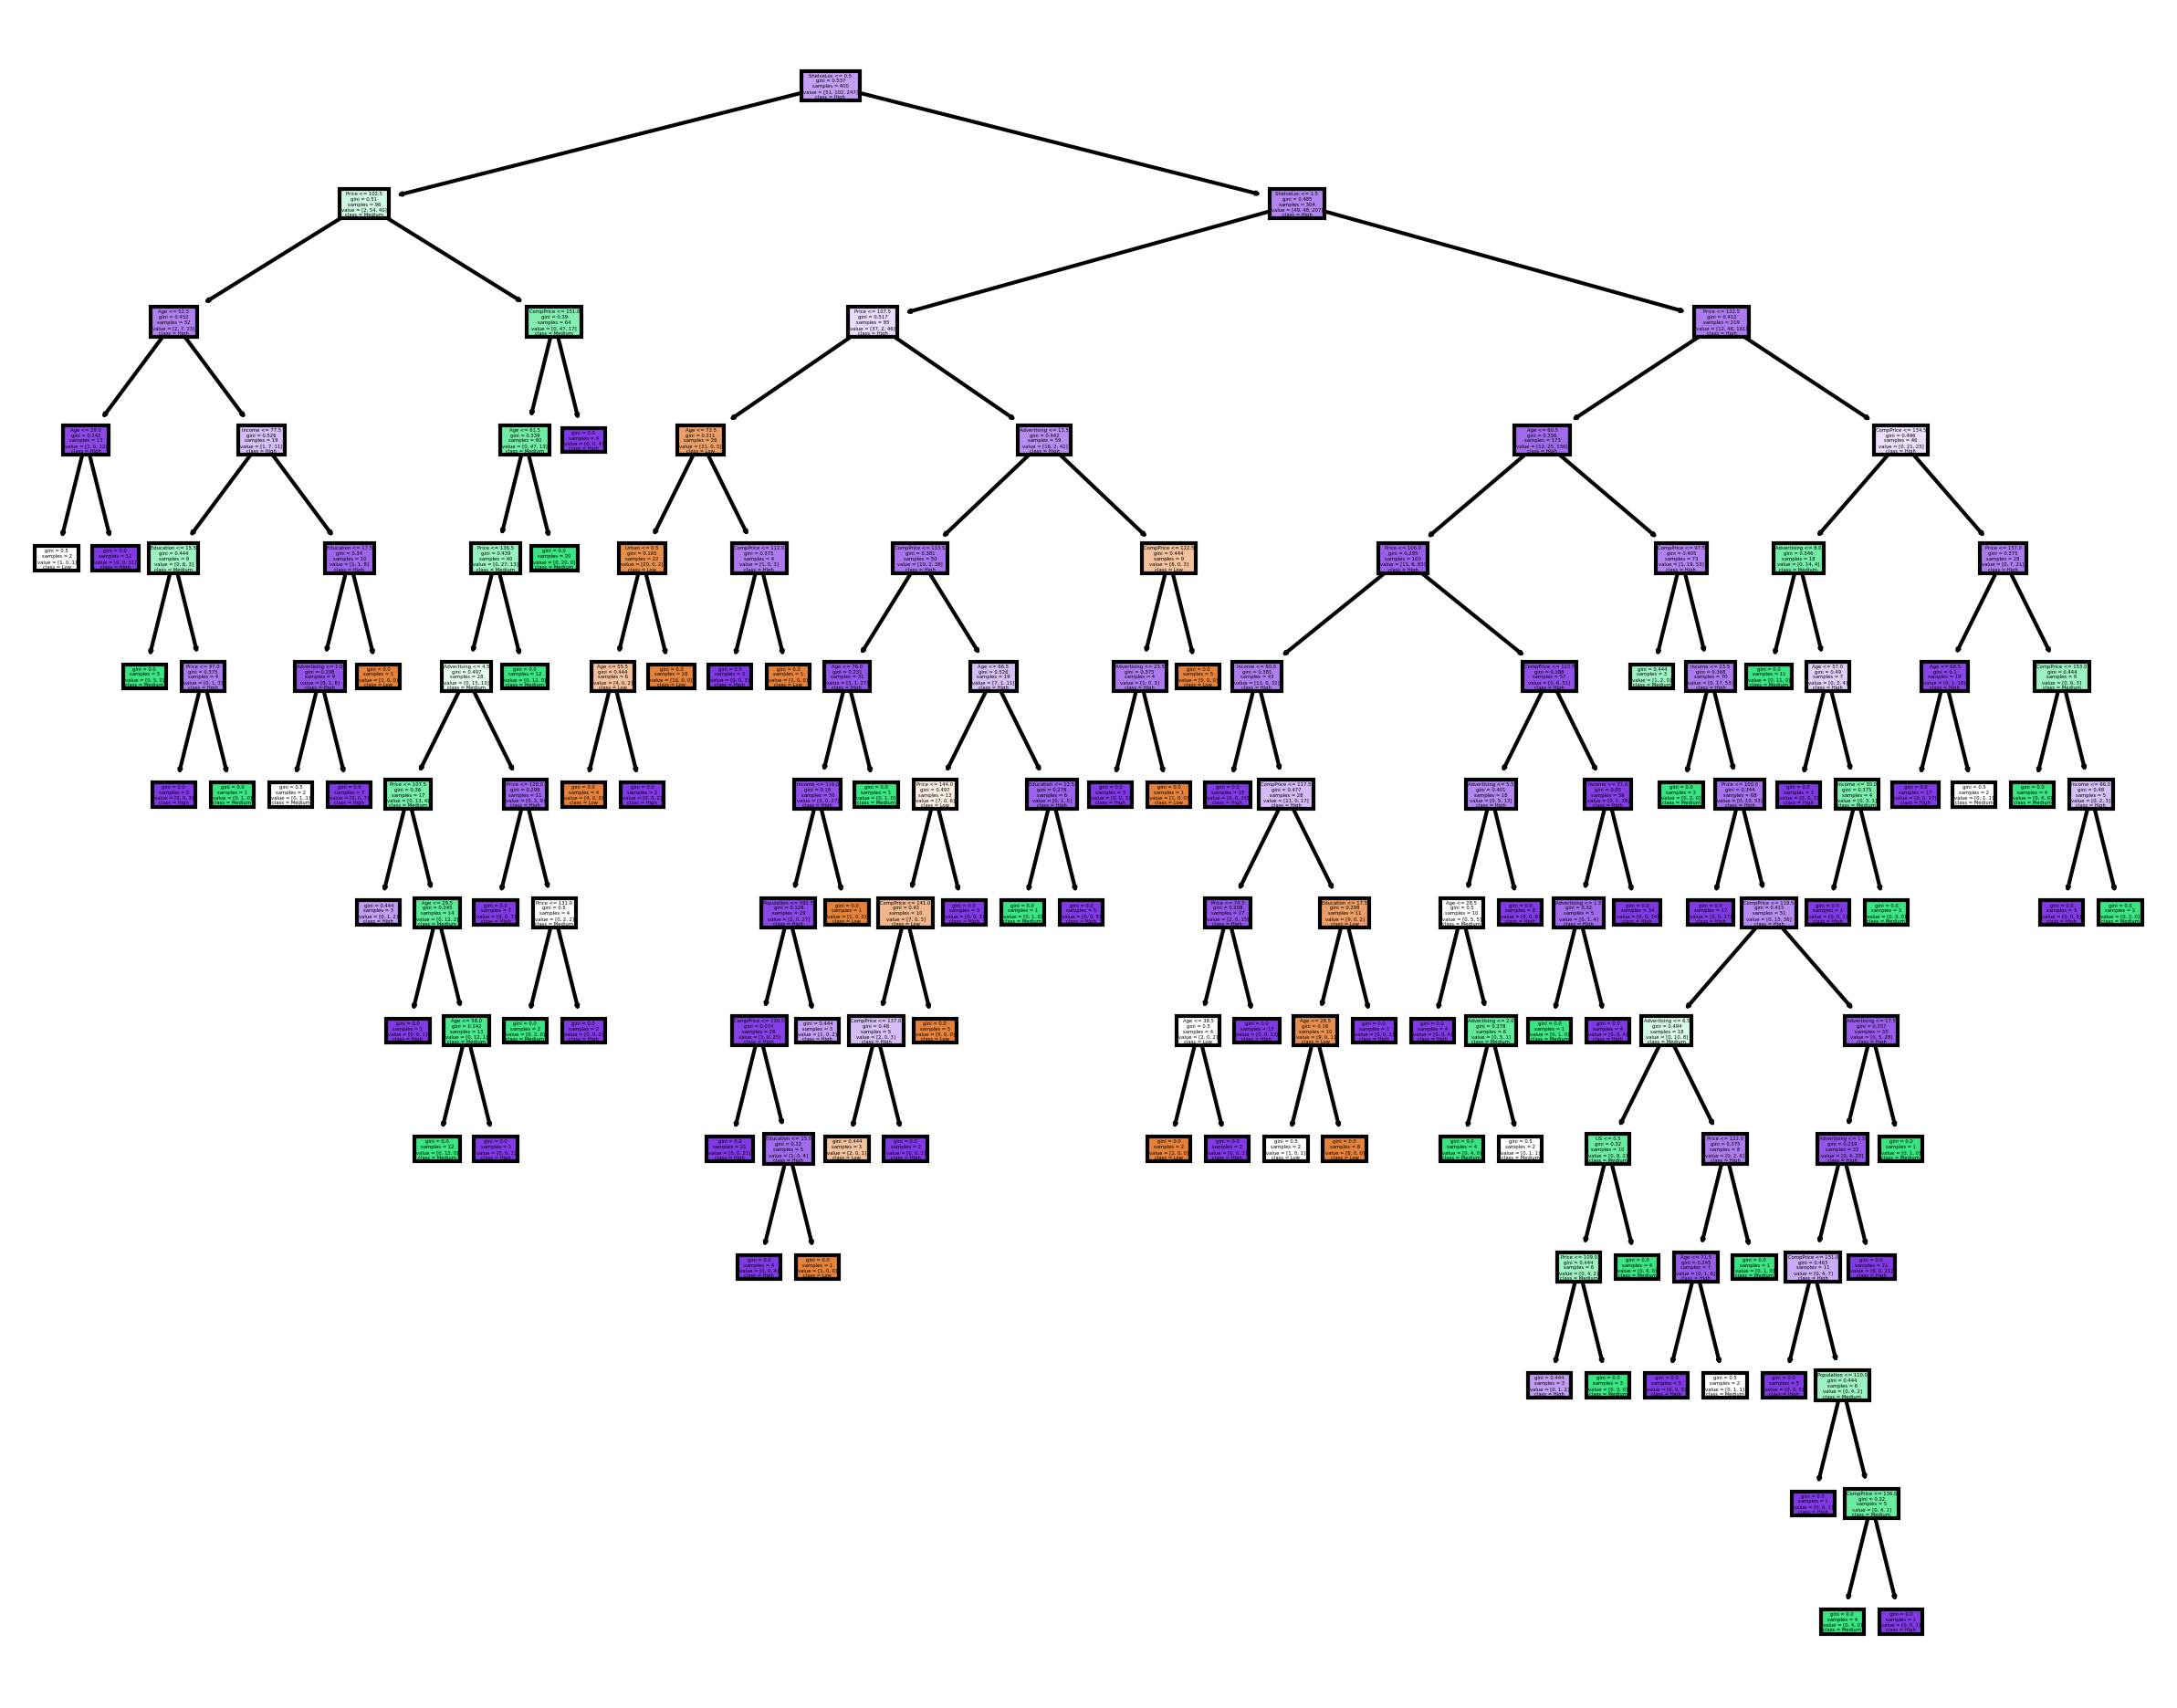

In [40]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn=['Low', 'Medium','High']
fig, axes = plt.subplots(figsize = (10,8), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [41]:
predict=model.predict(x_test)

In [42]:
print("Accuracy is",metrics.accuracy_score(predict,y_test)*100,'%')


Accuracy is 95.0 %
